## Analysis of Suicide Cases in India for years 2001-2012

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("data/SuicidesData.csv")

In [27]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [28]:
data.shape

(237519, 7)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


## Checking for null values

In [30]:
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

## Total Cases

In [31]:
data['Total'].sum()

13071734

## State cases

In [75]:
punjab = data['State'] == "Delhi (Ut)"
data[punjab].Total.sum()

84272

In [36]:
data.groupby('State').Total.sum().sort_values(ascending=False)

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Gujarat               330858
Chhattisgarh          302354
Odisha                267234
Rajasthan             255134
Uttar Pradesh         233352
Assam                 172276
Haryana               147176
Delhi (Ut)             84272
Total (Uts)            53836
Jharkhand              49720
Punjab                 46350
Bihar                  46214
Tripura                45965
Puducherry             32144
Himachal Pradesh       26562
Uttarakhand            18496
Goa                    17363
Jammu & Kashmir        14821
Sikkim                  9606
A & N Islands           8109
Arunachal Pradesh       6633
Meghalaya               5415
Chandigarh              5164
Mizoram                 4154
D & N Haveli            3430
Manipur 

## Yearly Data

In [42]:
yearData = data.groupby('Year').Total.sum().sort_values(ascending=False)
yearData

Year
2011    1219499
2010    1211322
2012    1189068
2009    1144033
2008    1125082
2007    1103667
2006    1062991
2005    1025201
2004    1023137
2003     997622
2002     993648
2001     976464
Name: Total, dtype: int64

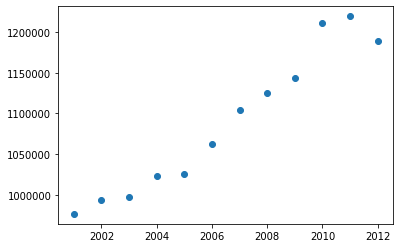

In [43]:
x = yearData.index.values
y = yearData.values
plt.scatter(x,y)
plt.show()

<BarContainer object of 12 artists>

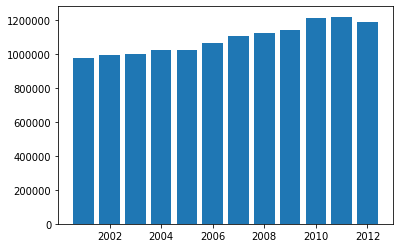

In [45]:
plt.bar(x,y)

## Numbers as per Gender 

In [46]:
data.groupby('Gender').Total.sum()

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

## State and Year wise data

In [47]:
data.groupby(['State','Year']).Total.sum()

State          Year
A & N Islands  2001      645
               2002      720
               2003      565
               2004      610
               2005      695
                       ...  
West Bengal    2008    74260
               2009    73240
               2010    80185
               2011    82460
               2012    44871
Name: Total, Length: 456, dtype: int64

In [50]:
htmlfile = data.groupby(['State','Year'])[['Total']].sum()
htmlfile.to_html('stateYearData.html')

In [51]:
data.groupby(['State','Gender'])[['Total']].sum()

Total
State             Gender        
A & N Islands     Female    2750
                  Male      5359
Andhra Pradesh    Female  271939
                  Male    542120
Arunachal Pradesh Female    1954
...                          ...
Uttar Pradesh     Male    125327
Uttarakhand       Female    7548
                  Male     10948
West Bengal       Female  365241
                  Male    484695

[76 rows x 1 columns]

In [53]:
data.groupby(['Year','Gender'])[['Total']].sum()

Total
Year Gender        
2001 Female  379645
     Male    596819
2002 Female  369675
     Male    623973
2003 Female  365657
     Male    631965
2004 Female  369297
     Male    653840
2005 Female  368980
     Male    656221
2006 Female  381677
     Male    681314
2007 Female  390032
     Male    713635
2008 Female  400202
     Male    724880
2009 Female  411050
     Male    732983
2010 Female  426705
     Male    784617
2011 Female  429688
     Male    789811
2012 Female  410366
     Male    778702

## State, Year and Gender based analysis

In [54]:
data.groupby(['State','Year','Gender'])[['Total']].sum()

Total
State         Year Gender       
A & N Islands 2001 Female    250
                   Male      395
              2002 Female    265
                   Male      455
              2003 Female    215
...                          ...
West Bengal   2010 Male    46505
              2011 Female  34340
                   Male    48120
              2012 Female  18831
                   Male    26040

[912 rows x 1 columns]

## Causes of the Suicides

In [55]:
data.groupby('Type').Total.sum().sort_values(ascending=False)

Type
Married                                           3065322
Primary                                           1088481
Middle                                            1028913
No Education                                       965271
Never Married                                      954903
                                                   ...   
Bankruptcy or Sudden change in Economic Status       2655
Illegitimate Pregnancy                               2494
Ideological Causes/Hero Worshipping                  2118
By Machine                                           1661
Not having Children (Barrenness/Impotency             766
Name: Total, Length: 69, dtype: int64

In [58]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [59]:
data.groupby('Age_group').Total.sum()

Age_group
0-100+    8735586
0-14        98410
15-29     1534037
30-44     1471599
45-59      885177
60+        346925
Name: Total, dtype: int64

## Age, Gender and causes based data

In [60]:
data.groupby(['Gender','Age_group']).Total.sum()

Gender  Age_group
Female  0-100+       3144078
        0-14           49436
        15-29         701215
        30-44         477461
        45-59         232542
        60+            98242
Male    0-100+       5591508
        0-14           48974
        15-29         832822
        30-44         994138
        45-59         652635
        60+           248683
Name: Total, dtype: int64

In [68]:
cause = data.groupby(['Year','State','Type'])[['Total']].sum().sort_values('Year',ascending=False)
cause.to_html("cause.html")

In [73]:
data.groupby(['Age_group','Type']).Total.sum()

Age_group  Type                                    
0-100+     Diploma                                       42459
           Divorcee                                      45816
           Graduate                                      93822
           Hr. Secondary/Intermediate/Pre-Universit     356724
           Married                                     3065322
                                                        ...   
60+        Service (Private)                              4161
           Student                                          45
           Suspected/Illicit Relation                      134
           Unemployed                                     6440
           Unemployment                                    378
Name: Total, Length: 293, dtype: int64